In [1]:
%matplotlib inline
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.optimize as sco
import warnings

# 전처리

In [2]:
df1 = pd.read_csv('/Users/sonhunseo/Desktop/공모전/KRX 공모전/KRX 공모전 데이터/KRX예선데이터/주식/[유가증권]일별 시세정보(주문번호-1300-27)/[유가증권]일별 시세정보(주문번호-1300-27)_202001.csv', encoding = 'euc-kr')
df2 = pd.read_csv('/Users/sonhunseo/Desktop/공모전/KRX 공모전/KRX 공모전 데이터/KRX예선데이터/주식/[유가증권]일별 시세정보(주문번호-1300-27)/[유가증권]일별 시세정보(주문번호-1300-27)_202002.csv', encoding = 'euc-kr')
df3 = pd.read_csv('/Users/sonhunseo/Desktop/공모전/KRX 공모전/KRX 공모전 데이터/KRX예선데이터/주식/[유가증권]일별 시세정보(주문번호-1300-27)/[유가증권]일별 시세정보(주문번호-1300-27)_202003.csv', encoding = 'euc-kr')
df = pd.concat([df1, df2, df3], axis=0, ignore_index=True)
df.head()

,거래일자,시장ID,종목코드,종목명,시가,고가,저가,종가,거래량,거래대금,...,주문량기준취소율,종목별거래횟수기준매수매도불균형,종목별거래량기준매수매도불균형,주문횟수기준주문불균형,주문량기준주문불균형,평균호가스프레드,평균비율스프레드,평균유효스프레드,평균실현스프레드,HS 역선택비용
0,20200102,STK,KR7000020008,동화약품보통주,8340,8400,8290,8400,111305,930888220,...,0.282367,0.589258,0.743097,1.174070,1.037233,17.741088,0.224266,21.390205,10.535714,10.854491
1,20200103,STK,KR7000020008,동화약품보통주,8400,8450,8290,8360,96437,805426020,...,0.302782,0.384342,0.445690,1.053480,0.753628,19.329715,0.217160,21.352313,8.745342,12.606971
2,20200106,STK,KR7000020008,동화약품보통주,8290,8330,8120,8180,73230,599423140,...,0.268639,0.423129,0.481504,1.577750,0.804115,20.122557,0.239991,20.802721,7.293777,13.508944
3,20200107,STK,KR7000020008,동화약품보통주,8200,8280,8090,8160,117904,960724080,...,0.255621,0.445963,0.617440,1.382292,0.846414,18.379562,0.188002,16.372671,-3.796296,20.168967
4,20200108,STK,KR7000020008,동화약품보통주,8170,8170,7830,7930,263246,2094786500,...,0.267502,0.331967,0.431773,1.485695,0.910060,19.933810,0.211230,22.397541,-3.992908,26.390449


In [3]:
df.columns

Index(['거래일자', '시장ID', '종목코드', '종목명', '시가', '고가', '저가', '종가', '거래량', '거래대금',
       '액면가', '기준가', 'KOSPI200구분', '업종구분', '상장주식수', '자본금', 'PER', '배당수익률',
       '락구분', '상장구분', '거래정지여부', '매도최우선호가가격', '매수최우선호가가격', '기세여부', '등락구분코드',
       '상장일', '대용가', '상한가', '하한가', '결산월', '제조업구분', '불성실공시여부', '관리종목여부',
       '정리매매여부', '매매수량단위', '당일종가직전체결가격', '시가총액', '거래빈도기준거래속도5일',
       '거래빈도기준거래속도10일', '거래빈도기준거래속도20일', '거래빈도기준거래속도60일', '거래량기준거래속도5일',
       '거래량기준거래속도10일', '거래량기준거래속도20일', '거래량기준거래속도60일', 'IOC취소주문량', 'FOK주문취소량',
       '주문빈도기준취소율', '주문량기준취소율', '종목별거래횟수기준매수매도불균형', '종목별거래량기준매수매도불균형',
       '주문횟수기준주문불균형', '주문량기준주문불균형', '평균호가스프레드', '평균비율스프레드', '평균유효스프레드',
       '평균실현스프레드', 'HS 역선택비용'],
      dtype='object')

In [4]:
#우리가 필요한 거래일자, 가격, 종목명, 코스피구분 만 인덱싱
df = df[['거래일자','종목명', '종가', 'KOSPI200구분']]

In [5]:
#코스피가 아닌 주식 제외
for i in range(len(df)):
    if df['KOSPI200구분'][i] == 'N':
        df = df.drop(i, axis=0)
    elif df['KOSPI200구분'][i] == 'Y':
        df = df
    else :
        df = df.drop(i, axis=0)
        
df

,거래일자,종목명,종가,KOSPI200구분
60,20200102,메리츠화재해상보험보통주,17150,Y
61,20200103,메리츠화재해상보험보통주,17150,Y
62,20200106,메리츠화재해상보험보통주,16650,Y
63,20200107,메리츠화재해상보험보통주,16400,Y
64,20200108,메리츠화재해상보험보통주,16150,Y
...,...,...,...,...
56621,20200325,두산퓨얼셀보통주,4890,Y
56622,20200326,두산퓨얼셀보통주,4920,Y
56623,20200327,두산퓨얼셀보통주,5160,Y
56624,20200330,두산퓨얼셀보통주,5180,Y


In [6]:
df = df.rename(index=df['거래일자'])
df = df.drop(['거래일자'], axis=1)

df1 = df.reset_index()
df1.rename(columns = {'index' : '거래일자'}, inplace = True)

df1 = df1[['거래일자', '종목명', '종가']]
df1

,거래일자,종목명,종가
0,20200102,메리츠화재해상보험보통주,17150
1,20200103,메리츠화재해상보험보통주,17150
2,20200106,메리츠화재해상보험보통주,16650
3,20200107,메리츠화재해상보험보통주,16400
4,20200108,메리츠화재해상보험보통주,16150
...,...,...,...
11341,20200325,두산퓨얼셀보통주,4890
11342,20200326,두산퓨얼셀보통주,4920
11343,20200327,두산퓨얼셀보통주,5160
11344,20200330,두산퓨얼셀보통주,5180


In [7]:
df_g = df[['종목명', '종가']]
groups = df_g.groupby('종목명')
groups.first().index # 종목 내역

Index(['BGF리테일보통주', 'BNK금융지주보통주', 'CJ보통주', 'DB손해보험보통주', 'DB하이텍보통주', 'GS건설보통주',
       'GS보통주', 'HDC현대산업개발보통주', 'KB금융지주 보통주', 'LG디스플레이보통주',
       ...
       '현대홈쇼핑보통주', '호텔신라보통주', '화승엔터프라이즈보통주', '효성보통주', '효성첨단소재보통주', '효성티앤씨보통주',
       '후성 보통주', '휠라코리아보통주', '휠라홀딩스보통주', '휴켐스보통주'],
      dtype='object', name='종목명', length=186)

In [8]:
groups.first().index[0] #max 185

'BGF리테일보통주'

# Efficient Frontier 예시 (랜덤으로 생성한 포트폴리오)

In [9]:
stocks = pd.DataFrame()
for i in range (3): #max 185
    stock = df.loc[df['종목명'] == groups.first().index[i]]
    stock_lastprice = stock[['종가']]
    stock_lastprice.columns = [groups.first().index[i]]
    stocks = pd.concat([stocks, stock_lastprice], axis=1)

stocks

,BGF리테일보통주,BNK금융지주보통주,CJ보통주
20200102,168500,7470,93800
20200103,169000,7490,92600
20200106,166500,7350,90300
20200107,169500,7430,91100
20200108,169500,7330,90900
...,...,...,...
20200325,122500,4175,64900
20200326,121000,4140,65300
20200327,118500,4300,64700
20200330,121000,4295,64100


## return (수익률)

<AxesSubplot:>

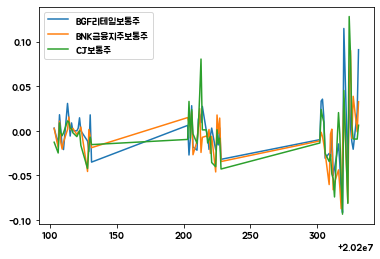

In [10]:
import matplotlib.font_manager as fm #한글 폰트 지원하기 위함
import matplotlib as mpl

returns = stocks.pct_change() ## 각 종목마다의 수익률

plt.rcParams['font.family']= 'BM JUA_OTF' #배민 주아체
mpl.rcParams['axes.unicode_minus'] = False #음수 오류 
returns.plot()

## 랜덤 포트폴리오 생성

In [11]:
NumOfAsset = len(stocks.columns)
port_returns = [] #수익률
port_stds = [] #Risk

for i in range (2500) :
    weights = np.random.random(NumOfAsset)
    weights /= np.sum(weights)
    
    p_return = np.sum(weights * returns.mean())*248 #248은 2020년 거래일자 수 
    p_std = np.sqrt(np.dot(weights.T, np.dot(returns.cov(), weights))) * np.sqrt(248)
    
    port_returns.append(p_return)
    port_stds.append(p_std)

## Efficient Frontier

<function matplotlib.pyplot.show(close=None, block=None)>

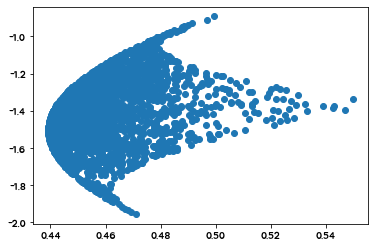

In [12]:
plt.scatter(port_stds, port_returns)
plt.show

# 포트폴리오 구성 함수화

## 종목 index 구하기

In [13]:
def FindIndex ():    
    x = input()
    for i in range (185):
        if groups.first().index[i] == x :
            return i

## 시계열 예측 함수

In [14]:
%pip install statsmodels

You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [15]:
from datetime import date
from datetime import datetime

def is_weekend(d): ##주말을 찾아내기 위한 함수 (주말제거)
    return d.weekday() > 4

In [18]:
def timeseriesanaly(dy): ##예측 구간
    import statsmodels.api as sm
    import statsmodels.tsa.api as tsa
    from statsmodels.tsa.stattools import adfuller
    from statsmodels.graphics.tsaplots import plot_predict
    from statsmodels.tsa.arima_model import ARIMA
    
    
    count = 0 ##몇일을 list에 넣었는가 day랑 같으면 list에 넣기 끝내기
    day = (62 + dy) ##현재 데이터 + 예측 구간
    month = 1 ##예측 시작 달
    current_yr = 2020 ##예측 시작 년
    current_day = 2 ##예측 시작 일
    
    fc_interval = list()
    
    while(True): ##거래일자 데이터프레임 만들기, 달 별로 다 if문으로 나눔 (string으로 처리해야 타입 바꿀 수 있어서)
        if(is_weekend(datetime(current_yr, month, current_day))):
            current_day += 1
            
            if(current_day == 32 and (month % 2 == 1 and (month != 9 and month != 11)) or month == 8 or month == 10 or month == 12): ##1 3 5 7 8 10 12
                month += 1
                current_day = 1

            elif(current_day == 31 and (month == 4 or month == 6 or month == 9 or month == 11)): ## 4 6 9 11
                month += 1
                current_day = 1

            elif(current_day == 29 and month == 2): # 2
                month += 1
                current_day = 1

            if(month == 13):
                current_yr += 1
                month = 1
                
            continue
        
        
        fc_interval.append(['%02d-%02d-%02d' %(current_yr, month, current_day)]) ##날짜를 list 에 append
        current_day += 1

        if(current_day == 32 and (month % 2 == 1 and (month != 9 and month != 11)) or month == 8 or month == 10 or month == 12): ##1 3 5 7 8 10 12
            month += 1
            current_day = 1

        elif(current_day == 31 and (month == 4 or month == 6 or month == 9 or month == 11)): ## 4 6 9 11
            month += 1
            current_day = 1

        elif(current_day == 29 and month == 2): # 2
            month += 1
            current_day = 1

        if(month == 13):
            current_yr += 1
            month = 1
            
        count += 1
        
        if(count == day):
            break
            
            
    fc_interval = pd.DataFrame(fc_interval, columns = ['거래일자']) ##날짜를 데이터 프레임화
    fc_interval['거래일자']= pd.to_datetime(fc_interval['거래일자'])
    
    
    for num in range(0, 50): ##num : 현재 분석하고 있는 종목의 인덱스

        threemonth = df1[df1['종목명'] == groups.first().index[num]]

        threemonth = threemonth.drop(['종목명'], axis = 1)

        threemonth['거래일자']= threemonth['거래일자'].astype('str')

        threemonth['거래일자'] = pd.to_datetime(threemonth['거래일자'])

        threemonth.set_index('거래일자', drop = True, inplace = True)    

    ##pvalue 가 0.05를 넘으면, 귀무가설 만족을 못한다. 즉, 정상성을 만족하지 않는다.
    ##dickey fuller test

        cnt = 0

        ##차분 과정을 몇번 할지 pvalue로 판정, cnt가 차분 해야 하는 횟수.
        while(True):

            if(cnt == 0):
                res = adfuller(threemonth)

                if(res[1] <= 0.05): ##0.05보다 pvalue가 작으면 break(차분이 충분하게 이루어짐)
                    break

                diffres = threemonth['종가'].diff().dropna()
                cnt = 1


            else:
                res = adfuller(diffres)

                if(res[1] <= 0.05):
                    break

                diffres = diffres.diff().dropna()
                cnt += 1



    ##iteration for p,d,q 모수 찾기 과정, aic 작은 모수를 찾기, 그리고 시장이 매번 7일 중으로 열리는 것을 기준으로, 계절성 고려하는 모수 도출(aic로 최적 계산)
        comp = 9999999999
        p = q = 0
        d = cnt
        for i in range(0, 3):
            for j in range(0, 3):

                model = sm.tsa.arima.ARIMA(threemonth, order=(i,d,j), enforce_stationarity = True, enforce_invertibility = True)

                model_fit = model.fit()

                if(comp > model_fit.aic):
                    comp = model_fit.aic
                    p = i
                    q = j
                    
        comp = 9999999999
        P = D = Q = 0
        for i in range(0, 3):
            for k in range(0, 3):
                model = sm.tsa.arima.ARIMA(threemonth, order=(p,d,q), seasonal_order = (i,1,k,5), enforce_stationarity = True, enforce_invertibility = True)

                model_fit = model.fit()

                if(comp > model_fit.aic):
                    comp = model_fit.aic
                    P = i
                    Q = k

        result_model = sm.tsa.arima.ARIMA(threemonth, order = (p,d,q), seasonal_order = (P,1,Q,5) , enforce_stationarity = True, enforce_invertibility = True)
        result_model_fit = result_model.fit()
        

    ##constant 포함하는 경우, 포함하지 않는 경우 모두 고려, nc로 하는 것이 보통 fit



    ##구축된 model 을 이용하여서 실제 예측 값을 데이터 프레임으로 도출


    ##예측 구간 데이터 프레임화


        preds = result_model_fit.predict(start = 1, end = count,typ='levels')

        preds = preds.to_frame(name = groups.first().index[num])
        
        data = preds.reset_index()
        
        
        fc_interval = pd.concat([fc_interval,data],axis=1)
        
        
        
    result_df =  fc_interval.drop(['index'],axis=1)

    
    return result_df ##최종 결과 반환


In [19]:
warnings.filterwarnings("ignore")

In [20]:
data_future = timeseriesanaly(27) #예측할 예측 구간을 parameter로 넣고, 데이터 프레임 도출 #기존 데이터와 3:1 비율이 27일
data_future = data_future.rename(index=data_future['거래일자'])
data_future = data_future.drop(['거래일자'], axis=1)

1, 2, 3월의 데이터를 시계열 분석해 마지막 데이터 기준 27일 이후까지의(거래일 기준)(5/5) 데이터를 예측하여 사용

In [21]:
data_future.pct_change() # 수익률 계산

,BGF리테일보통주,BNK금융지주보통주,CJ보통주,DB손해보험보통주,DB하이텍보통주,GS건설보통주,GS보통주,HDC현대산업개발보통주,KB금융지주 보통주,LG디스플레이보통주,...,대상보통주,대우건설보통주,대우조선해양보통주,대웅보통주,대웅제약보통주,대한유화보통주,대한전선보통주,대한항공보통주,더블유게임즈보통주,동국제강보통주
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,0.002967,0.001138,-0.012793,-0.449822,-1.075269e-02,0.000000,0.006000,0.031158,0.012889,0.046933,...,-0.002183,0.007511,-0.021497,-0.007663,-0.015777,-0.017241,-0.018800,-0.019749,-0.046519,0.019761
2020-01-06,-0.014793,-0.020255,-0.024838,-0.036893,1.449275e-02,-0.037705,-0.003976,-0.040870,-0.011665,-0.052831,...,-0.032823,-0.041534,-0.007830,-0.046332,0.009146,-0.043860,-0.020958,-0.029304,0.027122,-0.036126
2020-01-07,0.018018,0.009551,0.008859,-0.006048,2.220446e-16,-0.003407,0.007984,-0.028760,0.008584,0.035348,...,-0.002262,-0.016667,-0.016050,-0.020243,-0.017483,-0.013761,0.003322,0.013208,-0.011581,-0.002219
2020-01-08,0.862795,0.488980,0.862845,0.536984,6.691816e-01,0.631200,0.678784,0.613555,0.736141,0.472484,...,0.566702,0.476872,0.627680,0.532022,0.964627,0.988332,0.487736,0.672847,0.840061,0.465132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-29,0.038589,-0.034241,0.029044,0.038906,-3.922014e-03,0.005927,-0.045449,-0.040384,-0.035600,-0.033208,...,-0.003603,-0.024323,0.002254,0.003708,-0.014791,0.013249,-0.007217,-0.001650,0.024010,-0.036831
2020-04-30,0.026272,0.017853,0.003438,0.038902,3.319115e-02,0.049054,-0.005291,0.021856,-0.001428,0.015947,...,0.033706,0.005969,0.004520,0.050508,0.037275,0.035492,0.024811,0.001034,0.011835,-0.002993
2020-05-01,-0.001005,0.015417,0.021170,0.047754,-8.317586e-03,0.027364,0.113877,0.041830,0.048612,0.017522,...,0.030898,-0.003264,0.027441,0.007949,0.013672,0.049308,0.029807,0.036119,0.019606,0.002328
2020-05-04,-0.003630,-0.014161,0.001642,0.036816,-3.248387e-02,-0.021671,-0.051623,-0.002988,0.014327,-0.034984,...,-0.004589,-0.015956,-0.010717,-0.024361,-0.000713,-0.012607,-0.022468,0.000517,0.017014,-0.025633


## 포트폴리오 성능 함수

In [22]:
def portfolio_annualised_performance(weights, mean_returns, cov_matrix):
    returns = np.sum(mean_returns*weights ) *248
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(248)
    return std, returns

## Sharpe ratio (Risk adjust Return) 최대 포트폴리오 함수

In [23]:
#negative sharpe ratio
def neg_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate):
    p_var, p_ret = portfolio_annualised_performance(weights, mean_returns, cov_matrix)
    return -(p_ret - risk_free_rate) / p_var

#optimization : scipy에는 maximization 기능이 없어서 음수의 minimization으로 하였음
def max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate, index1, index2, per1, per2):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix, risk_free_rate)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1}, 
                   {'type': 'eq', 'fun' : lambda x: x[index1] - per1},
                   {'type': 'eq', 'fun' : lambda x: x[index2] - per2})

    # eq : 등호조건
    # fun : 함수
    # np.sum(x) - 1 : np.sum(x) = 1
    
    bound = (0,1)
    bounds = tuple(bound for asset in range(num_assets))
    result = sco.minimize(neg_sharpe_ratio, num_assets*[1/num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)
    
    #neg_sharpe_ratio : 목적함수
    #num_assets*[1/num_assets,] : 1/num_assets가 [1,num_assets]만큼 있는 array = 초기값
    #args : 목적함수 파생함수에 전달할 추가 인수
    #SLSQP : Sequencial Least Square Programming
    #bounds : 범위
    #mean_returns, cov_matrix, risk_free_rate가 추가인수로 주어졌으니 sharp ratio를 최대화하는 weight구함
    
    return result

## 최소 Risk 포트폴리오 함수

In [24]:
def portfolio_volatility(weights, mean_returns, cov_matrix):
    return portfolio_annualised_performance(weights, mean_returns, cov_matrix)[0]

def min_variance(mean_returns, cov_matrix, index1, index2, per1, per2):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1}, 
                   {'type': 'eq', 'fun' : lambda x: x[index1] - per1},
                   {'type': 'eq', 'fun' : lambda x: x[index2] - per2})
 
    bound = (0,1)
    bounds = tuple(bound for asset in range(num_assets))

    result = sco.minimize(portfolio_volatility, num_assets*[1/num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)

    return result

## 포트폴리오 생성 함수 (선택종목 2개)
### 선택 종목 수는 위의 constraints를 수정하면서 바꿀 수 있음

In [25]:
def Generate_Port (mean_returns, cov_matrix, risk_free_rate, index1, index2, per1, per2):
    
    max_sharpe = max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate, index1, index2, per1, per2)
    sdp, rp = portfolio_annualised_performance(max_sharpe['x'], mean_returns, cov_matrix)
    max_sharpe_allocation = pd.DataFrame(max_sharpe.x,index=data_future.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.replace(0, np.NaN)# 비율이 0인 종목 제거
    max_sharpe_allocation = max_sharpe_allocation.dropna()# 비율이 0인 종목 제거
    max_sharpe_allocation = max_sharpe_allocation.T

    min_vol = min_variance(mean_returns, cov_matrix, index1, index2, per1, per2)
    sdp_min, rp_min = portfolio_annualised_performance(min_vol['x'], mean_returns, cov_matrix)
    min_vol_allocation = pd.DataFrame(min_vol.x,index=data_future.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.replace(0, np.NaN)# 비율이 0인 종목 제거
    min_vol_allocation = min_vol_allocation.dropna()# 비율이 0인 종목 제거
    min_vol_allocation = min_vol_allocation.T
    
    print ("-"*80)
    print ("Maximum Sharpe Ratio Portfolio Allocation\n")
    print ("Annualised Return:", round(rp,2))
    print ("Annualised Volatility:", round(sdp,2))
    print ("\n")
    print (max_sharpe_allocation)
    print ("-"*80)
    print ("Minimum Volatility Portfolio Allocation\n")
    print ("Annualised Return:", round(rp_min,2))
    print ("Annualised Volatility:", round(sdp_min,2))
    print ("\n")
    print (min_vol_allocation)

In [26]:
returns = data_future.pct_change()
mean_returns = returns.mean()
cov_matrix = returns.cov()
risk_free_rate = 0.0075 ##2020 3월 기준금리

In [27]:
Generate_Port(mean_returns, cov_matrix, risk_free_rate, 3, 7, 0.2, 0.1) #종목1 index, 종목2 index, 종목1 비율, 종목2 비율

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 4.74
Annualised Volatility: 2.16


            DB손해보험보통주  HDC현대산업개발보통주  SK케미칼보통주  넷마블보통주
allocation       20.0          10.0     69.65    0.35
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualised Return: 0.8
Annualised Volatility: 1.39


            BNK금융지주보통주  DB손해보험보통주  HDC현대산업개발보통주  LG유플러스보통주  동국제강보통주
allocation       14.46       20.0          10.0      52.05     3.49
